In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import pandas as pd
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
RAW_FILE = "/Users/Alex/Downloads/Crimes_-_2001_to_Present.csv"

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782455,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7782456,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7782457,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7782458,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"


In [3]:
# explicitly setting the format to speed up pd.to_datetime
date_format = "%m/%d/%Y %H:%M:%S %p"


### Demonstrating/testing date_format
example = chicago_full.loc[0,'Date']
display(example)
pd.to_datetime(example,format=date_format)

'09/05/2015 01:30:00 PM'

Timestamp('2015-09-05 01:30:00')

In [4]:
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full = chicago_full.set_index('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1330412,G026686,01/01/2001 01:00:00 AM,019XX N HALSTED ST,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,...,NaN,NaN,06,1170604.0,1913228.0,2001,08/17/2015 03:03:40 PM,41.917383,-87.648623,"(41.917382588, -87.648623098)"
2001-01-01 01:00:00,1317937,G001149,01/01/2001 01:00:00 AM,024XX E 73 ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,NaN,NaN,08B,1193629.0,1856985.0,2001,08/17/2015 03:03:40 PM,41.762514,-87.565877,"(41.762514064, -87.565876899)"
2001-01-01 01:00:00,6808288,HR218860,01/01/2001 01:00:00 PM,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,3.0,38.0,06,1179872.0,1878745.0,2001,05/07/2009 01:05:12 AM,41.822551,-87.615632,"(41.822551254, -87.615631965)"
2001-01-01 01:00:00,1584605,G351833,01/01/2001 01:00:00 AM,024XX W CORTLAND ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,NaN,26,1159701.0,1912508.0,2001,08/17/2015 03:03:40 PM,41.915639,-87.688701,"(41.915638736, -87.688700749)"
2001-01-01 01:00:00,5462733,HN290220,01/01/2001 01:00:00 AM,058XX S INDIANA AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,20.0,40.0,20,1178551.0,1866538.0,2001,04/25/2007 05:57:12 AM,41.789084,-87.620849,"(41.789084341, -87.620849345)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18 12:50:00,13045687,JG227680,04/18/2023 12:50:00 AM,008XX W FULTON MARKET,0460,BATTERY,SIMPLE,BAR OR TAVERN,False,False,...,27.0,28.0,08B,1170577.0,1902075.0,2023,04/25/2023 04:47:28 PM,41.886779,-87.649049,"(41.886778688, -87.649049147)"
2023-04-18 12:51:00,13046438,JG228717,04/18/2023 12:51:00 PM,027XX N LINCOLN AVE,0820,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,...,43.0,7.0,06,1168081.0,1918487.0,2023,04/25/2023 04:47:28 PM,41.931868,-87.657740,"(41.931868465, -87.657740362)"
2023-04-18 12:52:00,13046101,JG228152,04/18/2023 12:52:00 PM,013XX S LAWNDALE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,...,24.0,29.0,08A,1151918.0,1893645.0,2023,04/25/2023 04:47:28 PM,41.864034,-87.717792,"(41.864033702, -87.717792133)"


In [5]:
(chicago_full.isna().sum()/len(chicago_full)).round(2)

ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.00
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    0.08
Community Area          0.08
FBI Code                0.00
X Coordinate            0.01
Y Coordinate            0.01
Year                    0.00
Updated On              0.00
Latitude                0.01
Longitude               0.01
Location                0.01
dtype: float64

In [6]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']
# save final df
chicago_final = chicago_full.drop(columns=drop_cols).sort_index()#.reset_index()
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1330412,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,2001,41.917383,-87.648623
2001-01-01 01:00:00,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,2001,41.762514,-87.565877
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
2001-01-01 01:00:00,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,2001,41.915639,-87.688701
2001-01-01 01:00:00,5462733,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18 12:50:00,13045687,04/18/2023 12:50:00 AM,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1214,12.0,27.0,2023,41.886779,-87.649049
2023-04-18 12:51:00,13046438,04/18/2023 12:51:00 PM,THEFT,$500 AND UNDER,RESIDENCE - PORCH / HALLWAY,False,False,1932,19.0,43.0,2023,41.931868,-87.657740
2023-04-18 12:52:00,13046101,04/18/2023 12:52:00 PM,ASSAULT,SIMPLE,STREET,False,False,1011,10.0,24.0,2023,41.864034,-87.717792


## Q1: Which district has the most crimes? Which has the least?

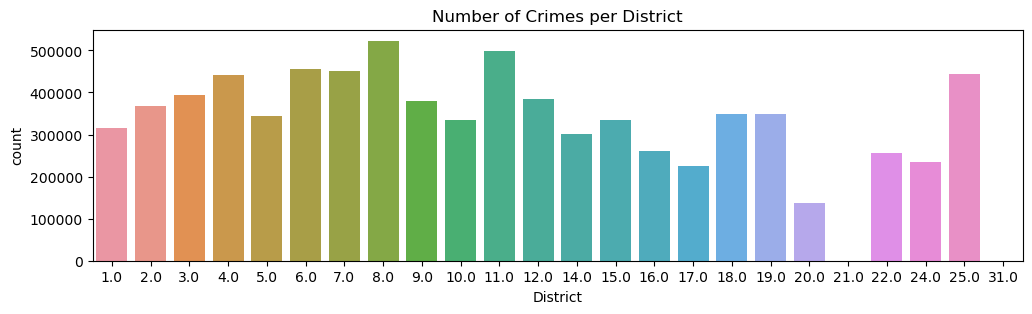

In [7]:
fig, ax = plt.subplots(figsize = (12, 3))
ax = sns.countplot(data = chicago_final, x = 'District')
ax.set(title = 'Number of Crimes per District');

- District 8 has the most crimes, while district 20 has the least amount of crimes (not including district 21 and 31, which have no crime data)

## Q2: Crimes across the years
    - Is the total number of crimes increasing or decreasing across the years?
    - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [8]:
chicago_final['Date'] = pd.to_datetime(chicago_final.index.strftime('%Y-%m-%d'))
chicago_final.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1330412,2001-01-01,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,2001,41.917383,-87.648623
2001-01-01 01:00:00,1317937,2001-01-01,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,2001,41.762514,-87.565877
2001-01-01 01:00:00,6808288,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
2001-01-01 01:00:00,1584605,2001-01-01,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,2001,41.915639,-87.688701
2001-01-01 01:00:00,5462733,2001-01-01,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849


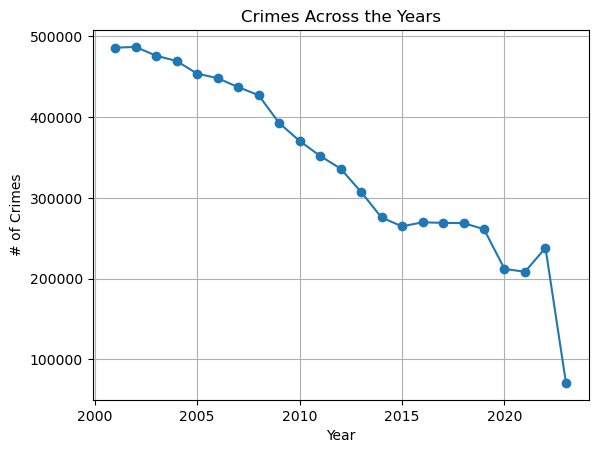

In [9]:
year_counts = chicago_final['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year').set(
    title = 'Crimes Across the Years');

- The total number of crimes seems to be decreasing over the years. 

<AxesSubplot: >

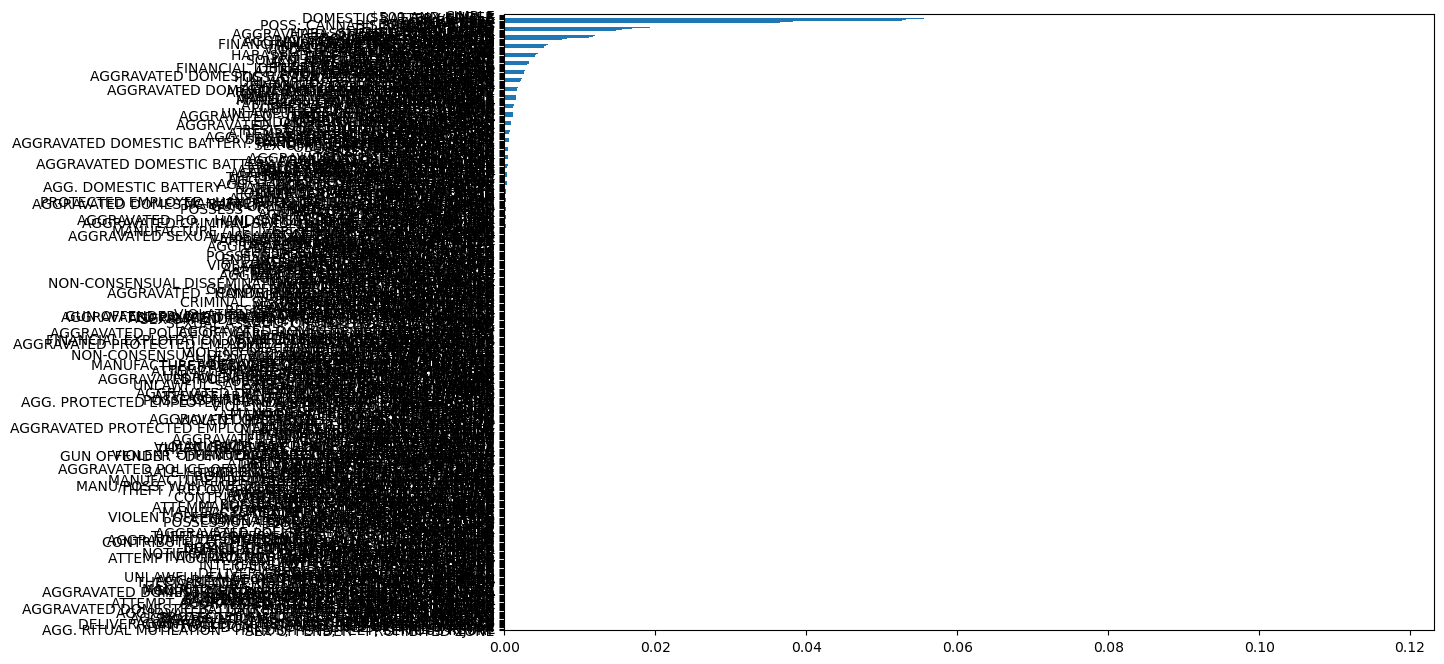

In [17]:
## Inspect the value_counts for the different types of crimes
crime_counts = chicago_final['Description'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(12,8))

In [18]:
crime_counts = chicago_final['Description'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
SIMPLE,913236
$500 AND UNDER,630905
DOMESTIC BATTERY SIMPLE,608388
TO VEHICLE,432559
OVER $500,414438
...,...
DOMESTIC VIOLENCE,1
DISCLOSE DV VICTIM LOCATION,1
PROTECTED EMPLOYEE: HANDS NO / MIN INJURY,1
AGGRAVATED PO: OTHER DANGEROUS WEAPON,1


In [19]:
# 1. get list of  unique crime descriptions
crime_list = chicago_final['Description'].unique()
crime_list

array(['$500 AND UNDER', 'SIMPLE', 'FINANCIAL ID THEFT: OVER $300',
       'HARASSMENT BY TELEPHONE', 'AGG CRIM SEX ABUSE FAM MEMBER',
       'TELEPHONE THREAT', 'AGGRAVATED: HANDGUN', 'CRIMINAL SEXUAL ABUSE',
       'AUTOMOBILE', 'TO PROPERTY', 'AGGRAVATED: OTHER DANG WEAPON',
       'TO VEHICLE', 'ARSON THREAT', 'AGG SEX ASSLT OF CHILD FAM MBR',
       'AGG: FINANCIAL ID THEFT', 'PREDATORY', 'OVER $500',
       'UNLAWFUL POSS OF HANDGUN', 'FRAUD OR CONFIDENCE GAME',
       'POSS: CANNABIS 30GMS OR LESS', 'FORCIBLE ENTRY',
       'AGGRAVATED:KNIFE/CUTTING INSTR', 'ILLEGAL ILL LOTTERY',
       'COUNTERFEITING DOCUMENT', 'ILLEGAL CONSUMPTION BY MINOR',
       'OTHER VEHICLE OFFENSE', 'THEFT OF LABOR/SERVICES',
       'ARMED: HANDGUN', 'POSS: CRACK', 'UNLAWFUL ENTRY',
       'RECKLESS CONDUCT', 'POSS: CANNABIS MORE THAN 30GMS',
       'LIQUOR LICENSE VIOLATION', 'SEX OFFENDER: FAIL REG NEW ADD',
       'ATTEMPT: ARMED-OTHER FIREARM', 'ATTEMPT FORCIBLE ENTRY',
       'UNLAWFUL USE HANDGUN

In [21]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = chicago_final.loc[ chicago_final['Description']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['$500 AND UNDER', 'SIMPLE', 'FINANCIAL ID THEFT: OVER $300', 'HARASSMENT BY TELEPHONE', 'AGG CRIM SEX ABUSE FAM MEMBER', 'TELEPHONE THREAT', 'AGGRAVATED: HANDGUN', 'CRIMINAL SEXUAL ABUSE', 'AUTOMOBILE', 'TO PROPERTY', 'AGGRAVATED: OTHER DANG WEAPON', 'TO VEHICLE', 'ARSON THREAT', 'AGG SEX ASSLT OF CHILD FAM MBR', 'AGG: FINANCIAL ID THEFT', 'PREDATORY', 'OVER $500', 'UNLAWFUL POSS OF HANDGUN', 'FRAUD OR CONFIDENCE GAME', 'POSS: CANNABIS 30GMS OR LESS', 'FORCIBLE ENTRY', 'AGGRAVATED:KNIFE/CUTTING INSTR', 'ILLEGAL ILL LOTTERY', 'COUNTERFEITING DOCUMENT', 'ILLEGAL CONSUMPTION BY MINOR', 'OTHER VEHICLE OFFENSE', 'THEFT OF LABOR/SERVICES', 'ARMED: HANDGUN', 'POSS: CRACK', 'UNLAWFUL ENTRY', 'RECKLESS CONDUCT', 'POSS: CANNABIS MORE THAN 30GMS', 'LIQUOR LICENSE VIOLATION', 'SEX OFFENDER: FAIL REG NEW ADD', 'ATTEMPT: ARMED-OTHER FIREARM', 'ATTEMPT FORCIBLE ENTRY', 'UNLAWFUL USE HANDGUN', 'NON-AGGRAVATED', 'POSS: HEROIN(WHITE)', 'AGGRAVATED PO: OTHER DANG WEAP', 'UNLAWFUL POSS OTHER FI

In [22]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,$500 AND UNDER,SIMPLE,FINANCIAL ID THEFT: OVER $300,HARASSMENT BY TELEPHONE,AGG CRIM SEX ABUSE FAM MEMBER,TELEPHONE THREAT,AGGRAVATED: HANDGUN,CRIMINAL SEXUAL ABUSE,AUTOMOBILE,TO PROPERTY,...,"AGG. RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY",SELL / ADVERTISE FIREWORKS,"ATTEMPT - CYCLE, SCOOTER, BIKE NO VIN",DISCLOSE DOMESTIC VIOLENCE VICTIM LOCATION,DELIVER CANNABIS TO PERSON UNDER 18,SECOND DEGREE MURDER,POSSESS - HYPODERMIC NEEDLE,"THEFT / RECOVERY - CYCLE, SCOOTER, BIKE NO VIN",DELIVER CONTROLLED SUBSTANCES TO PERSON UNDER 18,SEX OFFENDER - PROHIBITED ZONE
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,159,293,128.0,87,19.0,38,25.0,6,48,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,136,170,12.0,36,0.0,34,13.0,2,47,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,157,192,2.0,29,0.0,39,15.0,2,57,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,170,185,1.0,28,0.0,31,17.0,0,59,65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,167,205,2.0,21,0.0,34,12.0,1,63,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,59,95,NaN,4,NaN,12,NaN,1,45,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-15,33,87,NaN,8,NaN,8,NaN,0,71,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-16,46,69,NaN,2,NaN,13,NaN,1,63,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
crimes = ['SIMPLE','$500 AND UNDER', 'CRIMINAL SEXUAL ABUSE', 'HARASSMENT BY TELEPHONE',
          'OVER $500', 'TO PROPERTY', 'AUTOMOBILE', 'FORCIBLE ENTRY', 'FROM BUILDING']
crimes_ts = crimes_df[crimes].copy()
crimes_ts.head()

,SIMPLE,$500 AND UNDER,CRIMINAL SEXUAL ABUSE,HARASSMENT BY TELEPHONE,OVER $500,TO PROPERTY,AUTOMOBILE,FORCIBLE ENTRY,FROM BUILDING
Datetime,,,,,,,,,
2001-01-01,293,159,6,87,76,121,48,43,1
2001-01-02,170,136,2,36,67,54,47,47,0
2001-01-03,192,157,2,29,64,71,57,44,0
2001-01-04,185,170,0,28,68,65,59,38,0
2001-01-05,205,167,1,21,91,62,63,40,1


In [32]:
crimes_ts.isna().sum()

SIMPLE                     0
$500 AND UNDER             0
CRIMINAL SEXUAL ABUSE      0
HARASSMENT BY TELEPHONE    0
OVER $500                  0
TO PROPERTY                0
AUTOMOBILE                 0
FORCIBLE ENTRY             0
FROM BUILDING              0
dtype: int64

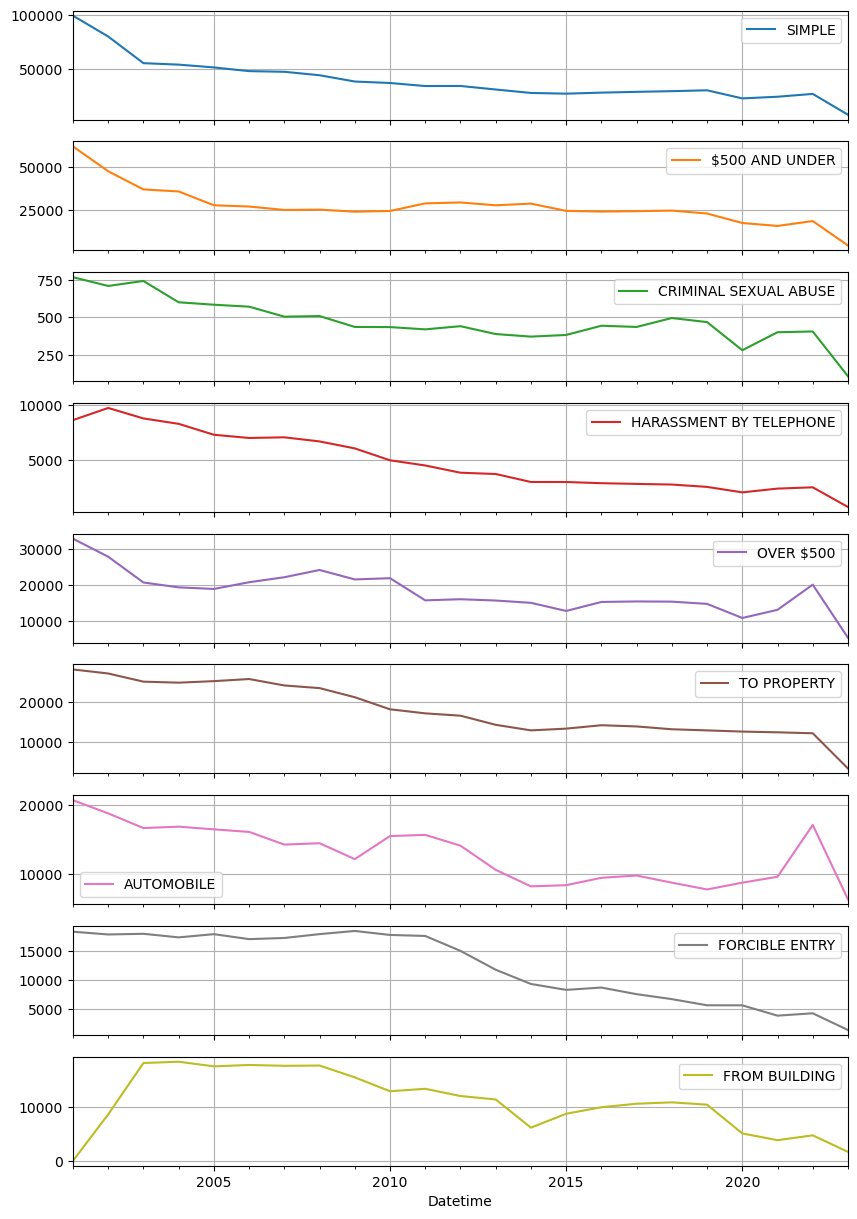

In [33]:
plot_df_Y = crimes_ts.loc['2001':'2023'].resample('AS').sum()
plot_df_Y.plot(grid=True,subplots=True,figsize=(10,15));

- Most crimes seem to decrease just as the overall crime rate does. From building rapidly increases from 2001-2003, but then declines. 

## Q3: Comparing Months
    - What months have the most crime? What months have the least?
    - Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [34]:
chicago_final.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1330412,2001-01-01,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,2001,41.917383,-87.648623
2001-01-01 01:00:00,1317937,2001-01-01,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,2001,41.762514,-87.565877
2001-01-01 01:00:00,6808288,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
2001-01-01 01:00:00,1584605,2001-01-01,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,2001,41.915639,-87.688701
2001-01-01 01:00:00,5462733,2001-01-01,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,233,2.0,20.0,2001,41.789084,-87.620849


In [38]:
## Extracting the Month
chicago_final['Month'] = chicago_final.index.month
chicago_final['MonthName'] = chicago_final.index.month_name()
chicago_final.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Month,MonthName
Datetime,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1330412,2001-01-01,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813,18.0,NaN,2001,41.917383,-87.648623,1,January
2001-01-01 01:00:00,1317937,2001-01-01,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,2001,41.762514,-87.565877,1,January
2001-01-01 01:00:00,6808288,2001-01-01,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632,1,January


[Text(0.5, 1.0, 'Crimes During Each Month')]

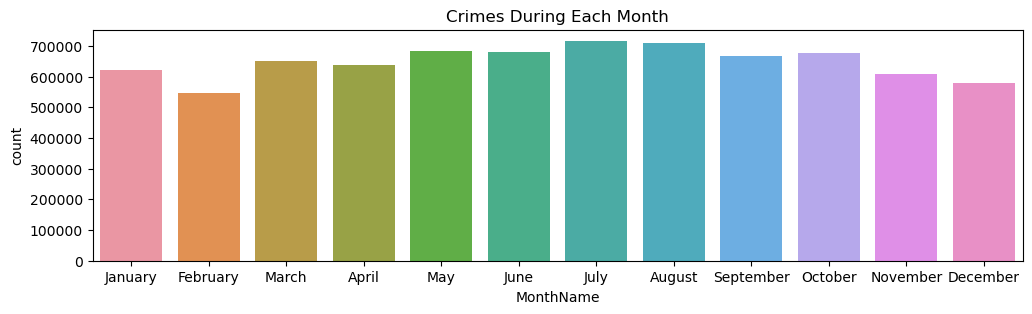

In [43]:
fig, ax = plt.subplots(figsize = (12,3))
sns.countplot(data = chicago_final, x = 'MonthName').set(title = 'Crimes During Each Month')

- The highest number of crimes is seen in July and August, and the lowest number of crimes is seen if February. It makes sense that February has the lowest crime rate because it is the shortest month. 

In [50]:
## Get # of crimes by Hour
crimes_by_month = chicago_final.groupby('Description')['MonthName'].value_counts().sort_index()
crimes_by_month

Description      MonthName
$300 AND UNDER   April        1
                 August       1
                 December     2
                 February     1
                 July         1
                             ..
WIREROOM/SPORTS  March        7
                 May          6
                 November     8
                 October      5
                 September    1
Name: MonthName, Length: 5669, dtype: int64

In [51]:
plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df

,Description,MonthName,# of Crimes
0,$300 AND UNDER,April,1
1,$300 AND UNDER,August,1
2,$300 AND UNDER,December,2
3,$300 AND UNDER,February,1
4,$300 AND UNDER,July,1
...,...,...,...
5664,WIREROOM/SPORTS,March,7
5665,WIREROOM/SPORTS,May,6
5666,WIREROOM/SPORTS,November,8
5667,WIREROOM/SPORTS,October,5


In [61]:
under300 = plot_df['Description'] == '$300 AND UNDER'

In [62]:
simple = plot_df['Description'] == 'SIMPLE'

In [63]:
under500 = plot_df['Description'] == '$500 AND UNDER'

In [64]:
abuse = plot_df['Description'] == 'CRIMINAL SEXUAL ABUSE'

In [65]:
phone = plot_df['Description'] == 'HARASSMENT BY TELEPHONE'

In [66]:
over500 = plot_df['Description'] == 'OVER $500'

In [67]:
auto = plot_df['Description'] == 'AUTOMOBILE'

In [68]:
filtered_df = plot_df[under300 | simple | under500 | abuse | phone | over500 | auto]
filtered_df.head()

,Description,MonthName,# of Crimes
0,$300 AND UNDER,April,1
1,$300 AND UNDER,August,1
2,$300 AND UNDER,December,2
3,$300 AND UNDER,February,1
4,$300 AND UNDER,July,1


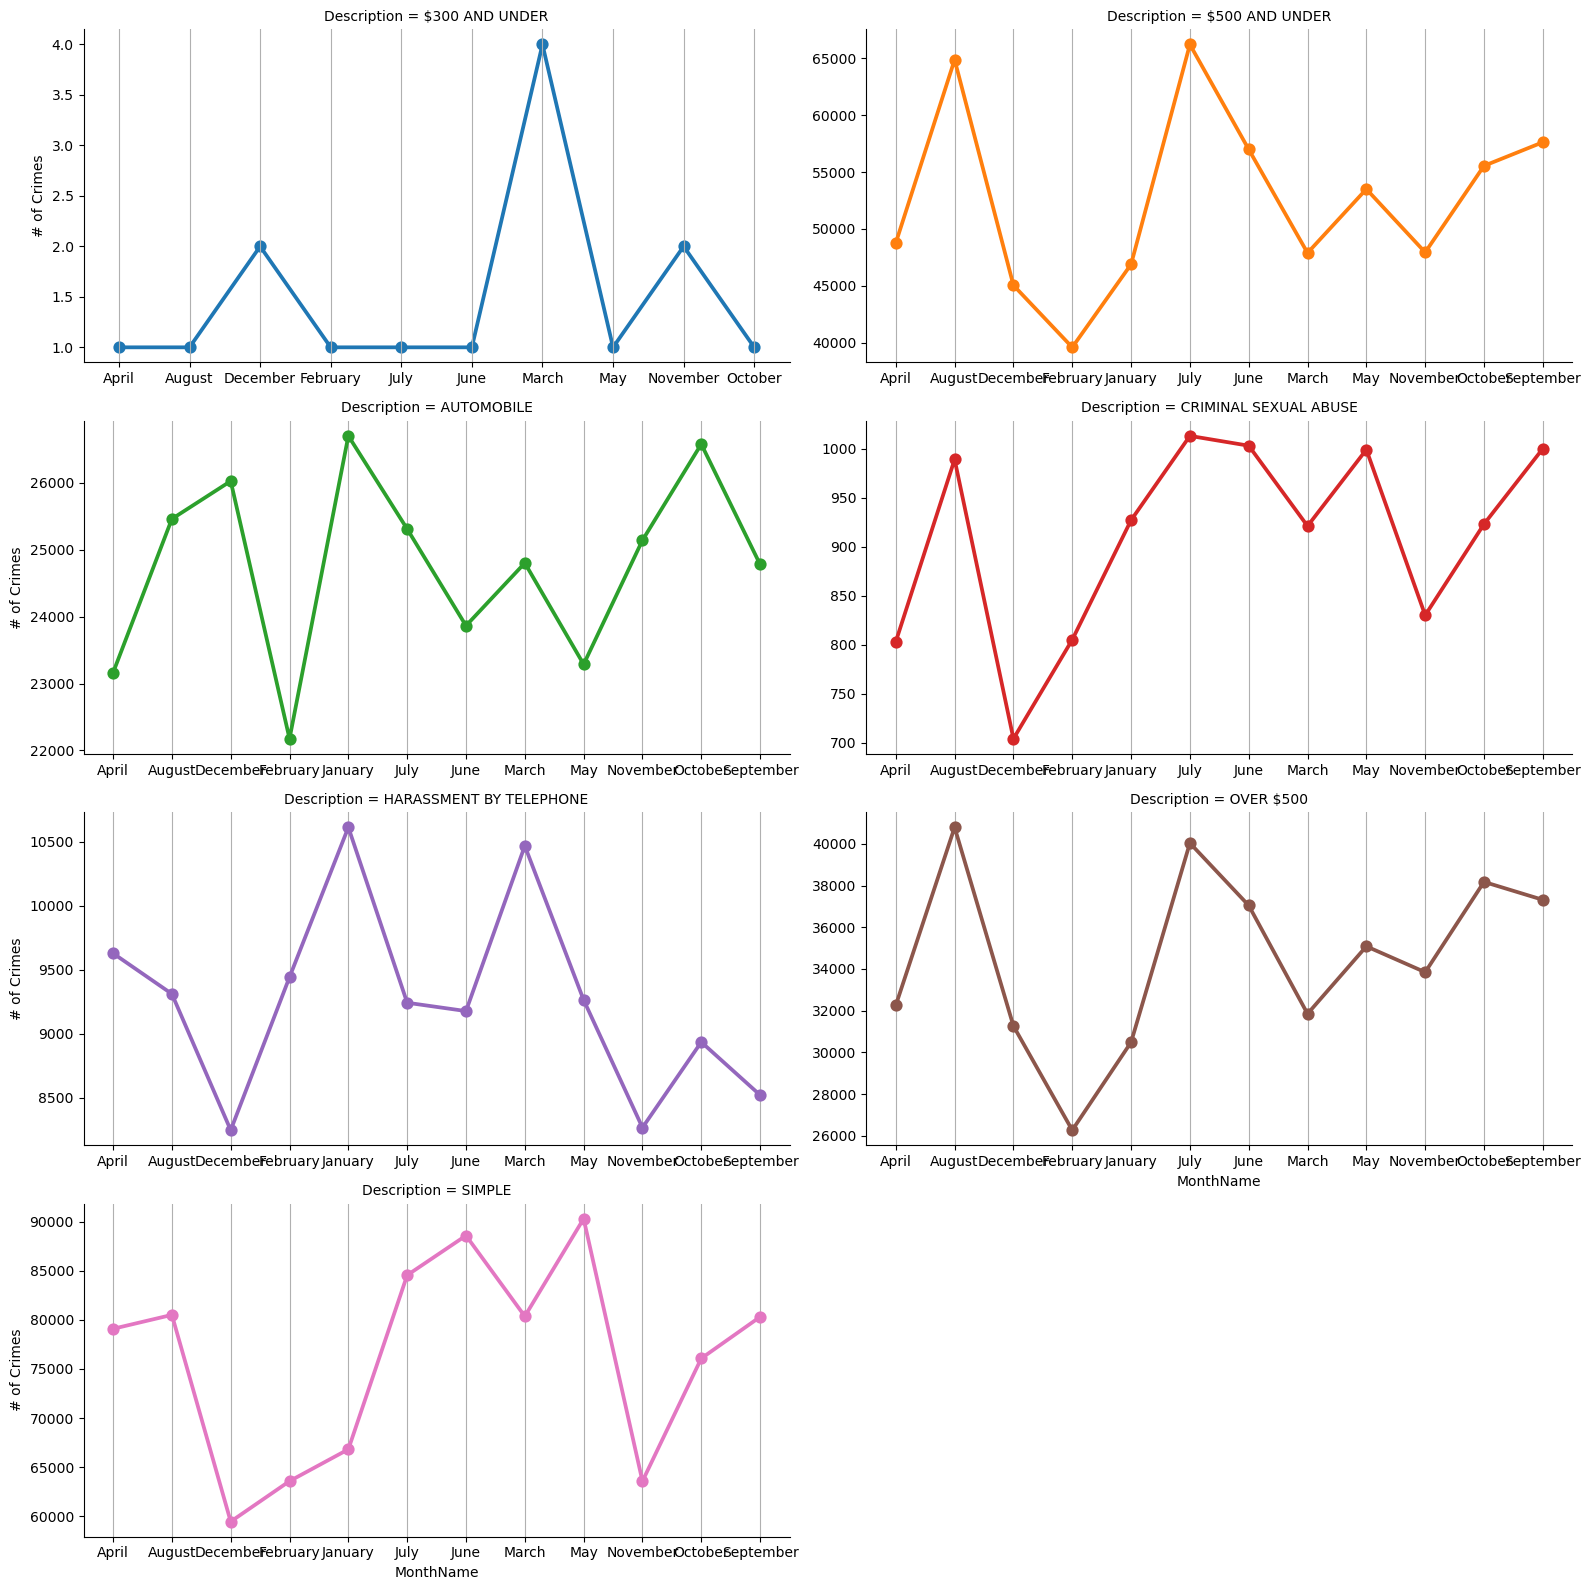

In [69]:
g = sns.catplot(data=filtered_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Description', col='Description',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

- Some crimes like simple, harassment by telephone, automobile, and $300 and under do not have July as their highest crime month. Most have December and February as the lowest months.  